In [106]:
# %load font.py
#!/usr/bin/env python

# In[ ]:


import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False



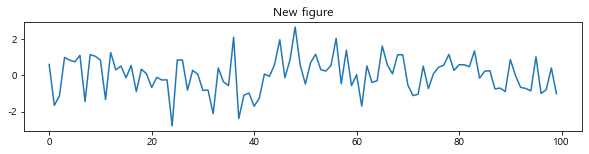

In [107]:
# 하나의 피규어에 하나의 그래프
plt.figure(figsize=(10,2)) # 사이즈 : Inch
plt.title('New figure')
plt.plot(np.random.randn(100))
plt.show()

AxesSubplot(0.125,0.536818;0.775x0.343182)


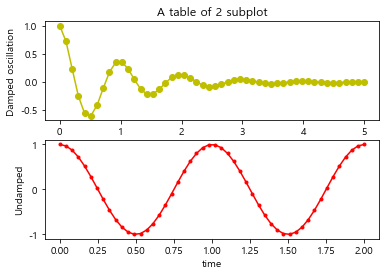

In [108]:
# subplot : 하나의 피규어에 여러 그래프

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2) 

ax1 = plt.subplot(2,1,1)                # 초기화를 위한(행, 열), 인덱스
plt.plot(x1, y1, 'yo-')
plt.title('A table of 2 subplot')
plt.ylabel('Damped oscillation')
print(ax1)

ax2 = plt.subplot(2,1,2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time')
plt.ylabel('Undamped')
plt.show()

In [204]:
# 선 그래프
# 시도별 전출입 인구수

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./dataset/data/시도별 전출입 인구수.xlsx', header = 0)

df.head(2)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226


In [205]:
# 전출지의 Nan 자료를 수정 -> 이전 자료의 값으로 대체
df.fillna(method='ffill',inplace=True)
df.head(2)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226


In [206]:
# 서울특별시에서 다른 지역으로 전출한 자료만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]

# '전출지별'은 같은 자료이므로 삭제
df_seoul.drop('전출지별', axis=1, inplace=True)

# '전입지별'을 '전입지'로 변경
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)

# 전입지 컬럼을 인덱스로 변경
df_seoul.set_index('전입지', inplace=True)
df_seoul.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484


In [207]:
# 서울에서 경기도로 전입한 인구수를 그래프로 확인
sr_one = df_seoul.loc['경기도']
sr_one.head(2)

1970    130149
1971    150313
Name: 경기도, dtype: object

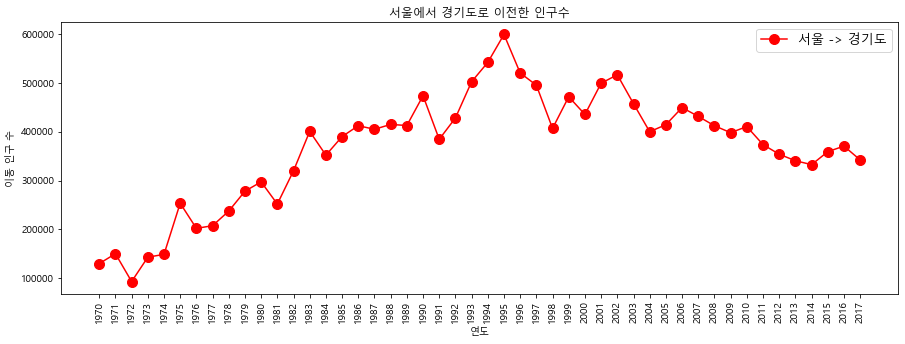

In [212]:
plt.figure(figsize=(15,5))                       # 그래프 사이즈 지정
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize=10, color='r')
plt.xticks(size=10, rotation='vertical')         # x축에 데이터를 세로로 회전
plt.title("서울에서 경기도로 이전한 인구수")
plt.xlabel('연도')
plt.ylabel('이동 인구 수')
plt.legend(labels=['서울 -> 경기도'], loc = 'upper right', fontsize = 13)
plt.show()


Text(10, 380000, '인구 이동 증가(1970 - 1995)')

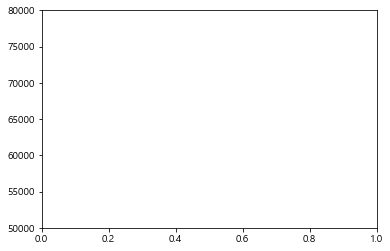

In [213]:
# annotate 추가

plt.ylim(50000, 80000)
plt.annotate('',
            xy = (20,620000),       # 화살표 시작점
            xytext=(2,290000),      # 화살표 끝점
            xycoords='data',
            arrowprops=dict(arrowstyle='->', color='blue', lw=3))

plt.annotate('인구 이동 증가(1970 - 1995)',
            xy = (10,380000),       # x,y 좌표
            rotation=22,
            va='baseline',           # center, top, bottom, baseline
            ha='center',
            fontsize=14)

# plt.show()

<AxesSubplot:xlabel='전입지'>

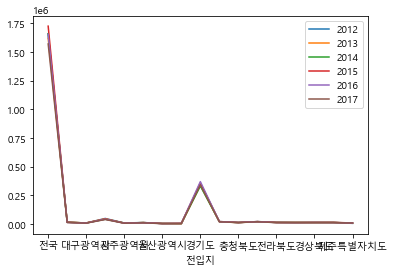

In [115]:
df_seoul.plot()

In [189]:
# 그래프를 matplotlib를 사용
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import font_manager, rc
font_path = 'C://Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


<function matplotlib.pyplot.show(close=None, block=None)>

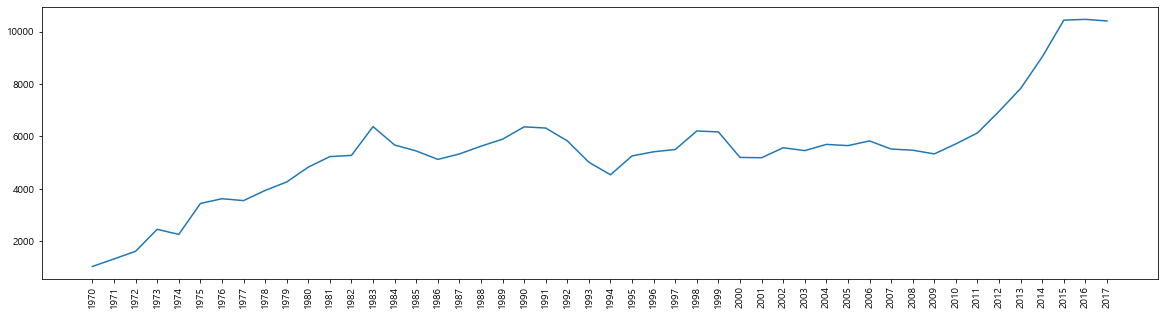

In [190]:
# 서울에서 제주도로 이동한 인구수만 검색해서 그래프로 나타내기

df_j = df[(df['전출지별'] == '서울특별시') & (df['전입지별'] == '제주특별자치도')]

df_j = df_j.drop('전출지별', axis =1)
df_j = df_j.set_index('전입지별')
sr_j = df_j.loc['제주특별자치도']


plt.figure(figsize = (20,5))
plt.plot(sr_j.index, sr_j.values)
plt.xticks(size=10, rotation='vertical')
plt.show

C:\Users\HPE\AppData\Local\Temp/ipykernel_852/4134749958.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\HPE\AppData\Local\Temp/ipykernel_852/4134749958.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_j.index, rotation=75)


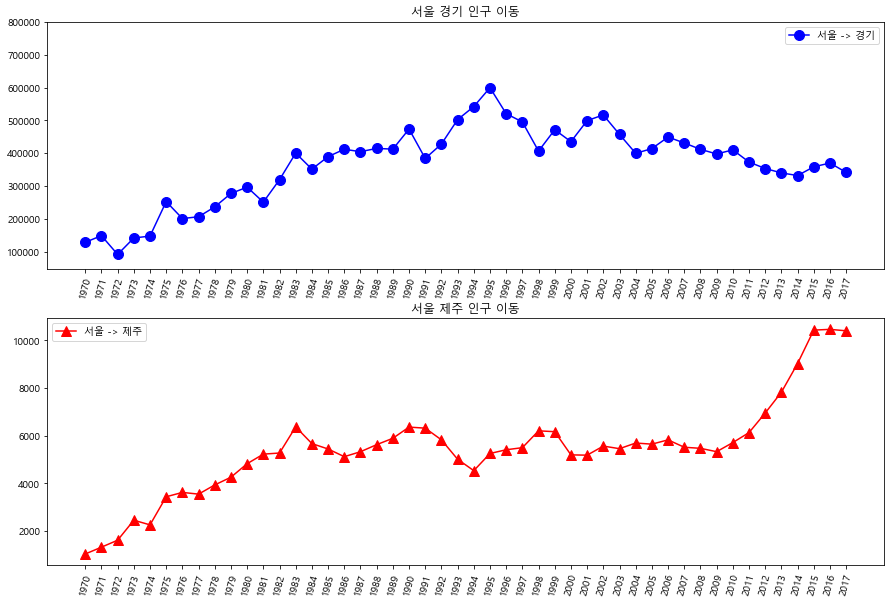

In [229]:
# 서울 -> 경기도 : sr_one
# 서울 -> 제주도 : sr_j

fig = plt.figure(figsize=(15,10))

# subplot에서는 대체로 set_함수이름 방식으로 진행됨
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# ax1에 서울 -> 경기도 : sr_one
ax1.plot(sr_one, 'o-', color='b',ms=10, label='서울 -> 경기')
ax2.plot(sr_j,   '^-', color='r',ms=10, label='서울 -> 제주')

ax1.set_title('서울 경기 인구 이동')
ax2.set_title('서울 제주 인구 이동')

ax1.legend(loc='best')
ax2.legend(loc='best')

# y축 범위 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
# ax2.set_ylim(50000, 800000)

# x축 연도 라벨 지정 -> 75도 기울여서
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_j.index, rotation=75)

# 눈금 라벨 크기
ax1.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='x', labelsize=10)

plt.show()

In [233]:
# 하나의 axes에 여러 개의 그래프를 추가로 그림
# 충청남도, 경상북도, 강원도, 1970 ~ 2018년 까지의 자료만 검색
col_years = list(map(str, range(1970,2018)))

df_1 = df_seoul.loc[['충청남도', '경상북도', '강원도'],col_years]
df_1

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


C:\Users\HPE\AppData\Local\Temp/ipykernel_852/2183092324.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation= 75)


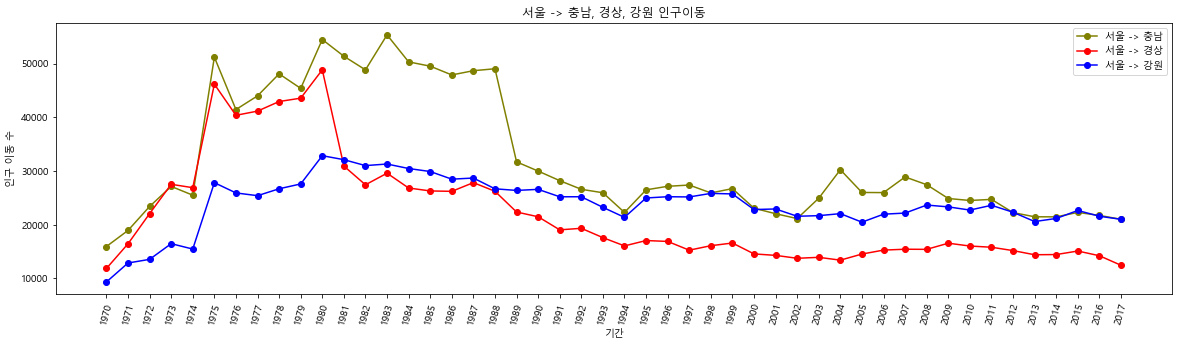

In [240]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_1.loc['충청남도',:], marker ='o' , color='olive', label='서울 -> 충남')
ax.plot(col_years, df_1.loc['경상북도',:], marker ='o' , color='red', label='서울 -> 경상')
ax.plot(col_years, df_1.loc['강원도',:], marker ='o' , color='blue', label='서울 -> 강원')

ax.legend(loc='best')
ax.set_title('서울 -> 충남, 경상, 강원 인구이동')
ax.set_xlabel('기간')
ax.set_ylabel('인구 이동 수')
ax.set_xticklabels(col_years, rotation= 75)
plt.show()

C:\Users\HPE\AppData\Local\Temp/ipykernel_852/1661480903.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation= 75)
C:\Users\HPE\AppData\Local\Temp/ipykernel_852/1661480903.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation= 75)
C:\Users\HPE\AppData\Local\Temp/ipykernel_852/1661480903.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation= 75)
C:\Users\HPE\AppData\Local\Temp/ipykernel_852/1661480903.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation= 75)


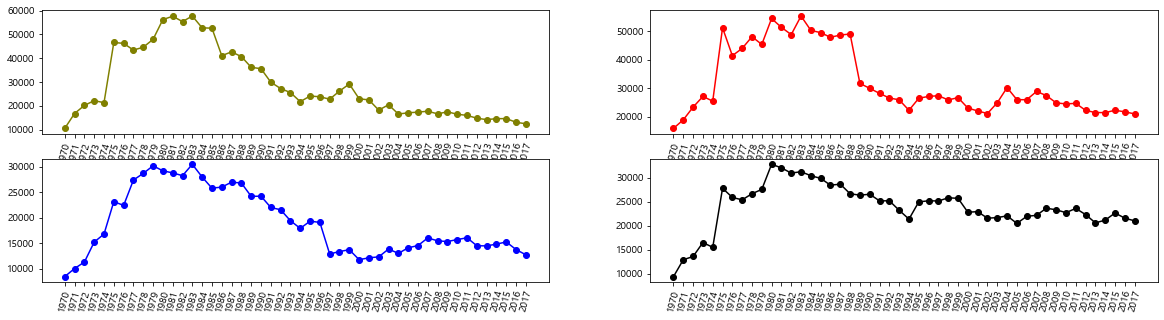

In [273]:
df_seoul.index
# '전라남도','충청남도', '경상남도','경기도'
df_m = df_seoul.loc[['전라남도','충청남도', '경상남도','강원도'],:]
df_m

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(2,2,1)

ax.plot(col_years, df_m.loc['전라남도',:], marker ='o' , color='olive', label='서울 -> 전남')
ax.set_xticklabels(col_years, rotation= 75)
ax = fig.add_subplot(2,2,2)

ax.plot(col_years, df_m.loc['충청남도',:], marker ='o' , color='red', label='서울 -> 충남')
ax.set_xticklabels(col_years, rotation= 75)

ax = fig.add_subplot(2,2,3)
ax.plot(col_years, df_m.loc['경상남도',:], marker ='o' , color='blue', label='서울 -> 경남')
ax.set_xticklabels(col_years, rotation= 75)

ax = fig.add_subplot(2,2,4)
ax.plot(col_years, df_m.loc['강원도',:], marker ='o' , color='black', label='서울 -> 강원')
ax.set_xticklabels(col_years, rotation= 75)

plt.show()

In [274]:
# 행열 위치 바꾸기
df_T = df_m.T
# 인덱스 int로 바꾸기
df_T.index = df_T.index.map(int)
df_T.index

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017],
           dtype='int64')

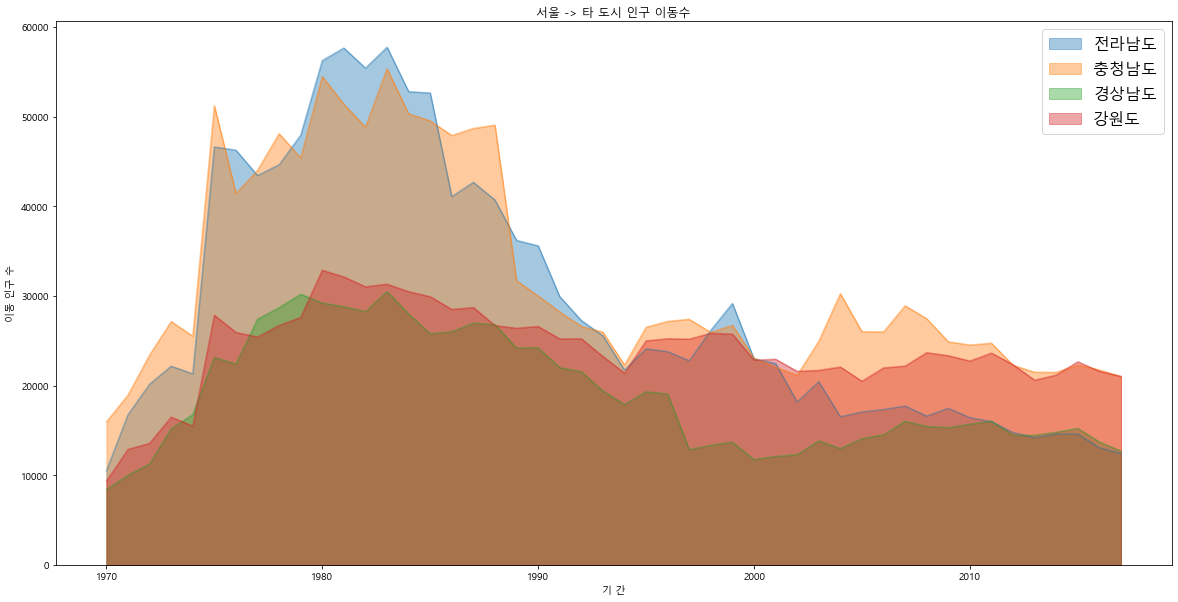

In [275]:
ax = df_T.plot(kind='area', figsize = (20,10), alpha = 0.4, stacked= False)
ax.set_title('서울 -> 타 도시 인구 이동수')
ax.set_ylabel('이동 인구 수')
ax.set_xlabel('기 간')
ax.legend(loc = 'best', fontsize=16)

plt.show()

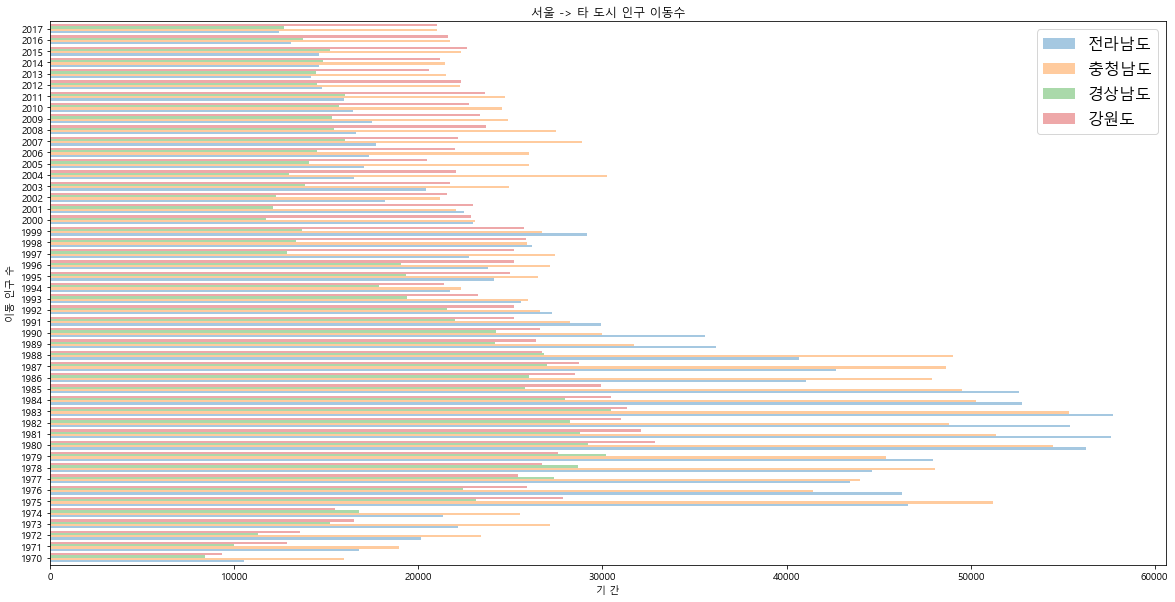

In [281]:
# 히스토그램
ax = df_T.plot(kind='barh', figsize = (20,10), alpha = 0.4, width = 0.8) # kind를 bar 혹은 barh로 주면 됌
ax.set_title('서울 -> 타 도시 인구 이동수')
ax.set_ylabel('이동 인구 수')
ax.set_xlabel('기 간')
ax.legend(loc = 'best', fontsize=16)

plt.show()

In [298]:
# 남북한 전력 발전량
df = pd.read_excel('./dataset/data/남북한발전전력량.xlsx')

# 북한 데이터만 가져오기
df = df.iloc[5:9]
df = df.drop('전력량 (억㎾h)', axis =1)
df = df.set_index('발전 전력별')
df = df.rename({'합계':'총발전량'})
df = df.T
df

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [299]:
# 총발전량 - 1년 -> 이전년도의 총발전량
df['총발전량 - 1년'] = df['총발전량'].shift(1)

# 증감율 (총발전량 / 이전 년도의 발전량 -1) * 100
df['증감율'] = ((df['총발전량']/df['총발전량 - 1년'])-1) * 100

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


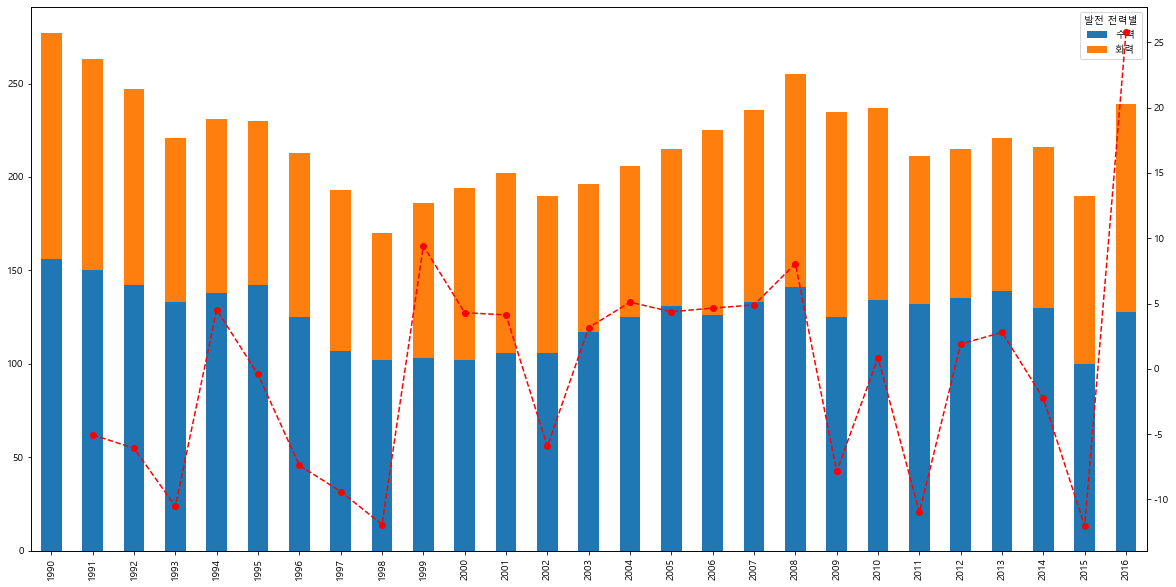

In [302]:
# 그래프 그리기 : 수력, 화력 -> 증감율
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20,10), stacked=True)
ax2 = ax1.twinx()

ax2.plot(df.index, df['증감율'], ls='--', marker='o', color='red', label='전년대비 증감율(%)')

